<a href="https://colab.research.google.com/github/heejjj/Sleeping_Project/blob/main/one_step_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# one-step-prediction

In [3]:
# 2/26일 데이터에 대한 one-step prediction
Feb_26 = pd.read_csv('/content/drive/MyDrive/KDT_project/HACKATHON/data_edit/Feb_26.csv')
Feb_26 = Feb_26.drop('Unnamed: 0', axis=1)

# datetime으로 데이터 타입 변경
Feb_26['Start'] = pd.to_datetime(Feb_26['Start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
Feb_26['End'] = pd.to_datetime(Feb_26['End'], format='%Y-%m-%d %H:%M:%S', errors='raise')
Feb_26.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Start           34 non-null     datetime64[ns]
 1   End             34 non-null     datetime64[ns]
 2   Duration (hr)   34 non-null     float64       
 3   Value           34 non-null     int64         
 4   Source          34 non-null     object        
 5   year_month_day  34 non-null     object        
 6   weekday         34 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 2.0+ KB


In [4]:
Feb_26

,Start,End,Duration (hr),Value,Source,year_month_day,weekday
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6
1,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6
2,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6
3,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6
4,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6
5,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch,2023-02-26,6
6,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch,2023-02-26,6
7,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch,2023-02-26,6
8,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch,2023-02-26,6
9,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch,2023-02-26,6


In [6]:
# 30초 간격으로 데이터를 보기로 했으므로 30초씩 증가시키는 시간 리스트 만듦.
import datetime

# 2/26일 데이터의 시작과 끝 시간으로 "Duration (hr)" 열보다 정확한 duration을 만든다.
start = Feb_26.iloc[0,0]
end = Feb_26.iloc[-1,1]

duration = end - start   # Timedelta('0 days 09:23:30')

k = duration.seconds // 30   # 30초 간격의 시간 몇 개로 만들어야 하는지. 33810초 / 30초 몫.

# 30초씩 증가시켜서 시간 리스트 만들기.
minute_list = [start]
for i in range(k):
  later = start + datetime.timedelta(seconds=30)
  minute_list.append(later)
  start = later

minute_list[:10]

[Timestamp('2023-02-26 00:00:40'),
 Timestamp('2023-02-26 00:01:10'),
 Timestamp('2023-02-26 00:01:40'),
 Timestamp('2023-02-26 00:02:10'),
 Timestamp('2023-02-26 00:02:40'),
 Timestamp('2023-02-26 00:03:10'),
 Timestamp('2023-02-26 00:03:40'),
 Timestamp('2023-02-26 00:04:10'),
 Timestamp('2023-02-26 00:04:40'),
 Timestamp('2023-02-26 00:05:10')]

In [7]:
minute_list[-10:]

[Timestamp('2023-02-26 09:19:40'),
 Timestamp('2023-02-26 09:20:10'),
 Timestamp('2023-02-26 09:20:40'),
 Timestamp('2023-02-26 09:21:10'),
 Timestamp('2023-02-26 09:21:40'),
 Timestamp('2023-02-26 09:22:10'),
 Timestamp('2023-02-26 09:22:40'),
 Timestamp('2023-02-26 09:23:10'),
 Timestamp('2023-02-26 09:23:40'),
 Timestamp('2023-02-26 09:24:10')]

In [8]:
# duration 열 추가.
Feb_26["duration"] = Feb_26["End"] - Feb_26['Start']
Feb_26

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,duration
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:00
1,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:06:00
2,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:30
3,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:30
4,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:19:30
5,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:17:00
6,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:00
7,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:34:30
8,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:09:30
9,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:18:30


In [9]:
# one-hot encondin을 위해 0으로 채워진 열 추가.
Feb_26[minute_list] = 0
Feb_26

<ipython-input-9-0596be68b078>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Feb_26[minute_list] = 0
<ipython-input-9-0596be68b078>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Feb_26[minute_list] = 0
<ipython-input-9-0596be68b078>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Feb_26[minute

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,duration,2023-02-26 00:00:40,2023-02-26 00:01:10,...,2023-02-26 09:19:40,2023-02-26 09:20:10,2023-02-26 09:20:40,2023-02-26 09:21:10,2023-02-26 09:21:40,2023-02-26 09:22:10,2023-02-26 09:22:40,2023-02-26 09:23:10,2023-02-26 09:23:40,2023-02-26 09:24:10
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:06:00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:30,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:30,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:19:30,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:17:00,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:00,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:34:30,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:09:30,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:18:30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# one-hot encoding
a = 8
for i in range(Feb_26.shape[0]):
  b = Feb_26.loc[i,'duration'].seconds//30
  Feb_26.iloc[i,a:a+b] = 1
  a += b

In [11]:
Feb_26

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,duration,2023-02-26 00:00:40,2023-02-26 00:01:10,...,2023-02-26 09:19:40,2023-02-26 09:20:10,2023-02-26 09:20:40,2023-02-26 09:21:10,2023-02-26 09:21:40,2023-02-26 09:22:10,2023-02-26 09:22:40,2023-02-26 09:23:10,2023-02-26 09:23:40,2023-02-26 09:24:10
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:00,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:06:00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:30,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:30,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:19:30,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:17:00,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:00,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:34:30,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:09:30,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:18:30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 우리가 참고하는 코로나 데이터가 one-hot encoding이 아닌 다른 방식으로 저장되어 있어 데이터 전처리 다시.

In [15]:
# 0으로 채워진 df 만들기
myArr = np.zeros(len(minute_list))
target = pd.DataFrame(columns = minute_list)
target.loc[0]= myArr
target

,2023-02-26 00:00:40,2023-02-26 00:01:10,2023-02-26 00:01:40,2023-02-26 00:02:10,2023-02-26 00:02:40,2023-02-26 00:03:10,2023-02-26 00:03:40,2023-02-26 00:04:10,2023-02-26 00:04:40,2023-02-26 00:05:10,...,2023-02-26 09:19:40,2023-02-26 09:20:10,2023-02-26 09:20:40,2023-02-26 09:21:10,2023-02-26 09:21:40,2023-02-26 09:22:10,2023-02-26 09:22:40,2023-02-26 09:23:10,2023-02-26 09:23:40,2023-02-26 09:24:10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# 0인 값을 해당하는 "Value"값 (= 수면 단계 값) 으로 채워준다.

a = 0
for i in range(len(minute_list)):
  for j in range(Feb_26.shape[0]):
    b = Feb_26.loc[j,'duration'].seconds//30
    target.iloc[0,a:a+b] = Feb_26.loc[j, 'Value']
    a += b

In [17]:
data = target.T
data

,0
2023-02-26 00:00:40,2.0
2023-02-26 00:01:10,2.0
2023-02-26 00:01:40,2.0
2023-02-26 00:02:10,2.0
2023-02-26 00:02:40,2.0
...,...
2023-02-26 09:22:10,2.0
2023-02-26 09:22:40,2.0
2023-02-26 09:23:10,2.0
2023-02-26 09:23:40,2.0


In [18]:
data.head(50)

,0
2023-02-26 00:00:40,2.0
2023-02-26 00:01:10,2.0
2023-02-26 00:01:40,2.0
2023-02-26 00:02:10,2.0
2023-02-26 00:02:40,2.0
2023-02-26 00:03:10,2.0
2023-02-26 00:03:40,4.0
2023-02-26 00:04:10,4.0
2023-02-26 00:04:40,4.0
2023-02-26 00:05:10,4.0


In [20]:
# one-step pred
# 크기가 N인 시계열 데이터를 N - seq_length 개의 지도학습용 데이터로 변환
# 지도학습용 데이터 구축하기

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 180
X, y = create_sequences(data, seq_length)

In [21]:
X.shape, y.shape

((948, 180, 1), (948, 1))

In [22]:
# 학습 : 검증 : 시험 =  8:1:1 
train_size = int(X.shape[0] * 0.8)
test_size = int(X.shape[0] * 0.1)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+test_size], y[train_size:train_size+test_size]
X_test, y_test = X[train_size+test_size:], y[train_size+test_size:]

In [23]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(758, 180, 1) (94, 180, 1) (96, 180, 1)
(758, 1) (94, 1) (96, 1)


In [ ]:
# minute_list 열을 transpose하고(이 열을 행 인덱스로 만들어야 함.) Value 값을 뽑은 1열 데이터로 만들어야 함.

In [24]:
# PyTorch 모델에 입력되기 위해 np.array 데이터 타입를 torch.Tensor 타입으로 변환
import torch

def make_Tensor(array):
  return torch.from_numpy(array).float()

In [25]:
X_train = make_Tensor(X_train)
y_train = make_Tensor(y_train)
X_val = make_Tensor(X_val)
y_val = make_Tensor(y_val)
X_test = make_Tensor(X_test)
y_test = make_Tensor(y_test)

# LSTM 모델 생성

In [26]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [27]:
# LSTM 모델 생성
class CovidPredictor(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(CovidPredictor, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        )
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
        )
    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

In [28]:
# 학습
def train_model(model, train_data, train_labels, val_data=None, val_labels=None, num_epochs=100, verbose = 10, patience = 10):
    loss_fn = torch.nn.L1Loss() #
    optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
    train_hist = []
    val_hist = []
    for t in range(num_epochs):

        epoch_loss = 0

        for idx, seq in enumerate(train_data): 

            model.reset_hidden_state() # seq 별 hidden state reset

            # train loss
            seq = torch.unsqueeze(seq, 0)
            y_pred = model(seq)
            loss = loss_fn(y_pred[0].float(), train_labels[idx]) # 1개의 step에 대한 loss

            # update weights
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_loss += loss.item()

        train_hist.append(epoch_loss / len(train_data))

        if val_data is not None:

            with torch.no_grad():

                val_loss = 0

                for val_idx, val_seq in enumerate(val_data):

                    model.reset_hidden_state() # seq 별로 hidden state 초기화 

                    val_seq = torch.unsqueeze(val_seq, 0)
                    y_val_pred = model(val_seq)
                    val_step_loss = loss_fn(y_val_pred[0].float(), val_labels[val_idx])

                    val_loss += val_step_loss
                
            val_hist.append(val_loss / len(val_data)) # val hist에 추가

            ## verbose 번째 마다 loss 출력 
            if t % verbose == 0:
                print(f'Epoch {t} train loss: {epoch_loss / len(train_data)} val loss: {val_loss / len(val_data)}')

            ## patience 번째 마다 early stopping 여부 확인
            if (t % patience == 0) & (t != 0):
                
                ## loss가 커졌다면 early stop
                if val_hist[t - patience] < val_hist[t] :

                    print('\n Early Stopping')

                    break

        elif t % verbose == 0:
            print(f'Epoch {t} train loss: {epoch_loss / len(train_data)}')

            
    return model, train_hist, val_hist

In [29]:
model = CovidPredictor(
    n_features=1,
    n_hidden=4,
    seq_len=seq_length,
    n_layers=1
)
model, train_hist, val_hist = train_model(
    model,
    X_train,
    y_train,
    X_val,
    y_val,
    num_epochs=100,
    verbose=10,
    patience=50
)

Epoch 0 train loss: 0.7618405309390267 val loss: 0.4149301052093506
Epoch 10 train loss: 0.05183718937368066 val loss: 0.015917940065264702
Epoch 20 train loss: 0.05403404562957683 val loss: 0.027470218017697334
Epoch 30 train loss: 0.05559660136542408 val loss: 0.03563878685235977
Epoch 40 train loss: 0.053731161245884555 val loss: 0.04065024480223656
Epoch 50 train loss: 0.052413972512398675 val loss: 0.03276766091585159
Epoch 60 train loss: 0.05254691367413564 val loss: 0.03903839364647865
Epoch 70 train loss: 0.05123983602725107 val loss: 0.0304836668074131
Epoch 80 train loss: 0.050724639505698374 val loss: 0.0281327273696661
Epoch 90 train loss: 0.04885338903417059 val loss: 0.015762249007821083


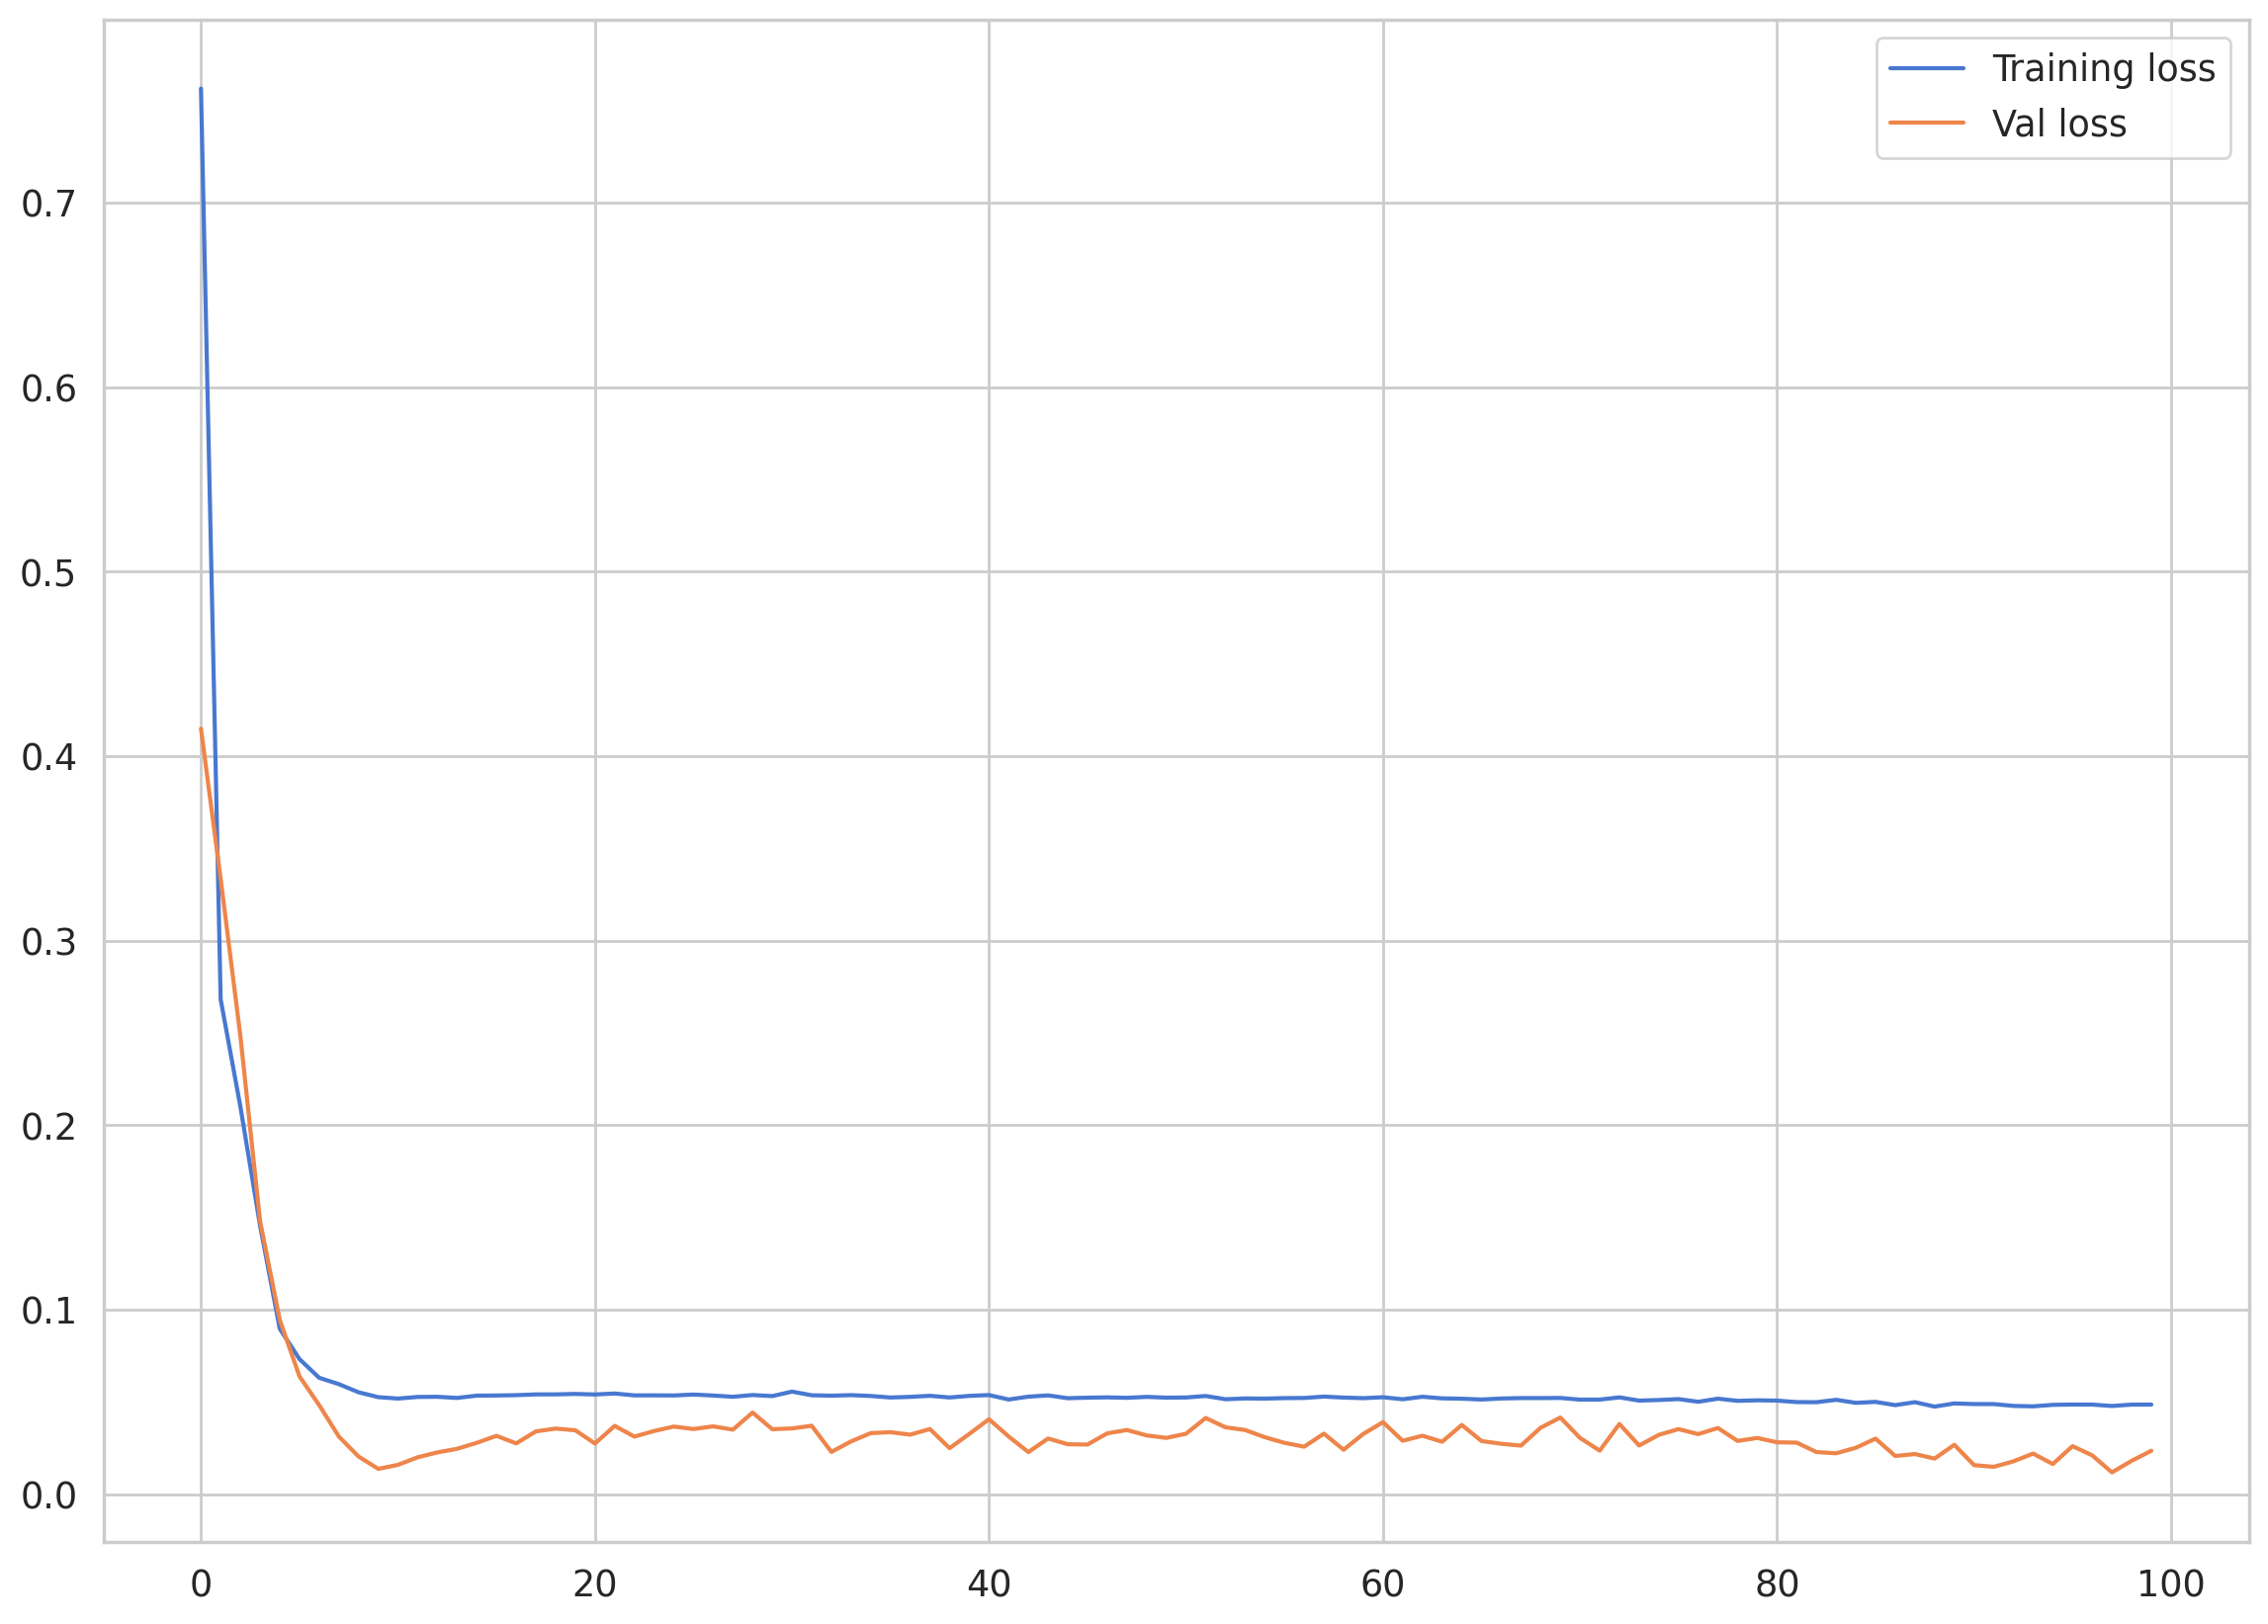

In [30]:
plt.plot(train_hist, label="Training loss")
plt.plot(val_hist, label="Val loss")
plt.legend()